In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (classification_report, plot_roc_curve, f1_score, 
                             roc_auc_score, balanced_accuracy_score)
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [5]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
import time

# Compare three classifiers

- Logistic regression

- Random Forest

- Decision Tree

In [6]:
data = pd.read_csv('creditcard.csv')
data.drop_duplicates(inplace=True)

In [7]:
y = data.pop('Class')

In [8]:
comparison_df=pd.DataFrame(columns=['Method','Score_Auc','Score_F1','Time'])

## Logistic Regression from grid search the best params fro pipeline ( 'best_feat__k': 10, 'log__max_iter': 10000, 'log__solver': 'lbfgs' )

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3,random_state=2)

In [10]:
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

model_pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                                 ('best_feat', SelectKBest(k=10)),
                                 ('log', LogisticRegression(class_weight='balanced',max_iter=10000,solver='lbfgs'))
                                ])

In [11]:
start = time.time()
model_pipeline.fit(X_train,y_train)
stop = time.time()
log_time = stop - start
print(log_time)
predictions = model_pipeline.predict(X_test)

print('Random For Clf score for test set: %f' %
          model_pipeline.score(X_test, y_test))
y_true, y_pred = y_test, model_pipeline.predict(X_test)
print(classification_report(y_true, y_pred))

2.685931921005249
Random For Clf score for test set: 0.987829
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     84987
           1       0.10      0.89      0.18       131

    accuracy                           0.99     85118
   macro avg       0.55      0.94      0.59     85118
weighted avg       1.00      0.99      0.99     85118



Text(0.5, 257.44, 'Predicted label')

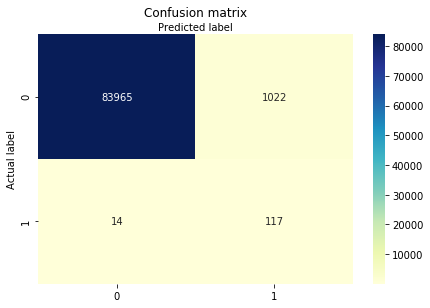

In [12]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [13]:
log_fpr, log_tpr, thresholds = metrics.roc_curve(y_test, y_pred)
metrics.auc(log_fpr, log_tpr)

0.9405522012032913

In [14]:
loga_probs = model_pipeline.predict_proba(X_test)
loga_probs = loga_probs[:, 1]

In [15]:
loga_auc = roc_auc_score(y_test, loga_probs)

In [16]:
loga_auc

0.9771049402526494

In [17]:
loga_fpr, loga_tpr, _ = metrics.roc_curve(y_test, loga_probs)

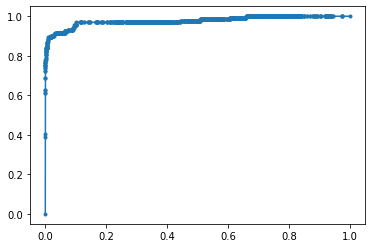

In [18]:
plt.plot(loga_fpr, loga_tpr, marker='.', label='Logistic')

In [19]:
from sklearn.metrics import roc_auc_score

In [20]:
lr_probs = model_pipeline.predict_proba(X_test)
lr_probs = lr_probs[:, 1]

In [21]:
log_precision, log_recall, _ = precision_recall_curve(y_test, lr_probs)
log_f1, log_auc = f1_score(y_test, predictions), auc(log_recall, log_precision)

In [22]:
print('Logistic: f1=%.3f auc=%.3f' % (log_f1, log_auc))

Logistic: f1=0.184 auc=0.714


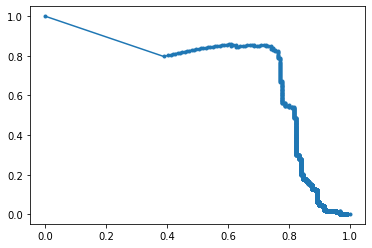

In [23]:
plt.plot(log_recall, log_precision, marker='.', label='Logistic')

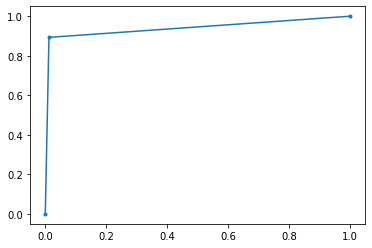

In [24]:
plt.plot(log_fpr, log_tpr, marker='.', label='Logistic')

In [25]:
comparison_df=comparison_df.append({'Method': "Logistic",'Score_Auc': loga_auc, 'Score_F1' : log_f1 , 'Time' : log_time},ignore_index=True)

In [26]:
comparison_df

,Method,Score_Auc,Score_F1,Time
0,Logistic,0.977105,0.184252,2.685932


## Decission Tree from grid search best params ( 'best_feat__k': 8, 'dec_tree__max_depth': 10 )

In [27]:
model_pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                                 ('best_feat', SelectKBest(k=8)),
                                 ('dec_tree', DecisionTreeClassifier(class_weight = 'balanced',max_depth=10))
                                ])

In [28]:
start = time.time()
model_pipeline.fit(X_train,y_train)
stop = time.time()
dec_time = stop - start
print(dec_time)
predictions = model_pipeline.predict(X_test)

print('Dec Tree Clf score for test set: %f' %
          model_pipeline.score(X_test, y_test))
y_true, y_pred = y_test, model_pipeline.predict(X_test)
print(classification_report(y_true, y_pred))

7.684011697769165
Dec Tree Clf score for test set: 0.987923
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     84987
           1       0.10      0.87      0.18       131

    accuracy                           0.99     85118
   macro avg       0.55      0.93      0.59     85118
weighted avg       1.00      0.99      0.99     85118



Text(0.5, 257.44, 'Predicted label')

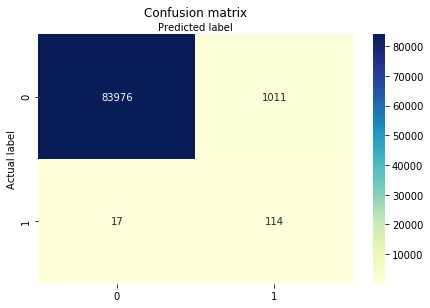

In [29]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [30]:
dec_fpr, dec_tpr, thresholds = metrics.roc_curve(y_test, y_pred)
metrics.auc(dec_fpr, dec_tpr)

0.9291665353039624

In [31]:
deca_probs = model_pipeline.predict_proba(X_test)
deca_probs = deca_probs[:, 1]

In [32]:
deca_auc = roc_auc_score(y_test, deca_probs)

In [33]:
deca_auc

0.9187839864507343

In [34]:
deca_fpr, deca_tpr, _ = metrics.roc_curve(y_test, deca_probs)

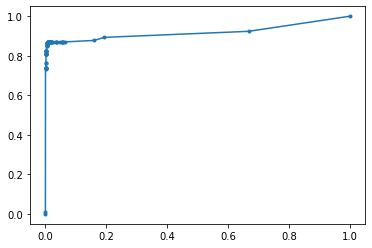

In [35]:
plt.plot(deca_fpr, deca_tpr, marker='.', label='dec')

In [36]:
model_pipeline.fit(X_train,y_train)
log2_probs = model_pipeline.predict_proba(X_test)
log2_probs = log2_probs[:, 1]
y_pred = model_pipeline.predict(X_test)
log2_precision, log2_recall, _ = precision_recall_curve(y_test, log2_probs)
log2_f1, log2_auc = f1_score(y_test,y_pred), auc(log2_recall, log2_precision)
print('XGBoost: f1=%.3f auc=%.3f' % (log2_f1, log2_auc))
print (classification_report(y_test,y_pred))

XGBoost: f1=0.182 auc=0.284
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     84987
           1       0.10      0.87      0.18       131

    accuracy                           0.99     85118
   macro avg       0.55      0.93      0.59     85118
weighted avg       1.00      0.99      0.99     85118



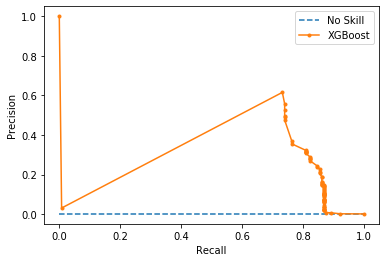

In [37]:
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(log2_recall, log2_precision, marker='.', label='XGBoost')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

Logistic: f1=0.182 auc=0.284


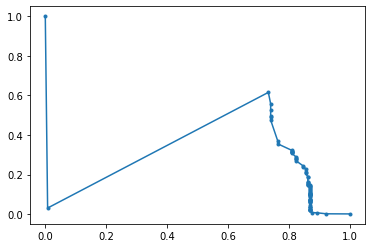

In [38]:
yhat = model_pipeline.predict(X_test)

dec_probs = model_pipeline.predict_proba(X_test)
dec_probs = dec_probs[:, 1]

dec_precision, dec_recall, _ = precision_recall_curve(y_test, dec_probs)
dec_f1, dec_auc = f1_score(y_test, yhat), auc(dec_recall, dec_precision)

print('Logistic: f1=%.3f auc=%.3f' % (dec_f1, dec_auc))

plt.plot(dec_recall, dec_precision, marker='.', label='dec')

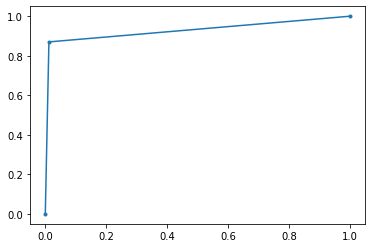

In [39]:
plt.plot(dec_fpr, dec_tpr, marker='.', label='Decission Tree')

In [40]:
comparison_df=comparison_df.append({'Method': "Decission Tree",'Score_Auc': deca_auc, 'Score_F1' : dec_f1 , 'Time' : dec_time},ignore_index=True)

## Random Forest from grid search best params ( 'best_feat__k': 9, 'random_forest__max_depth': 10 , 'random_forest__n_estimators' : 80 )

In [41]:
model_pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                                 ('best_feat', SelectKBest(k=9)),
                                 ('random_forest', RandomForestClassifier(class_weight = 'balanced',n_estimators=80,max_depth=10))
                                ])

In [42]:
start = time.time()
model_pipeline.fit(X_train,y_train)
stop = time.time()
ran_time = stop - start
print(ran_time)
predictions = model_pipeline.predict(X_test)

print('Dec Tree Clf score for test set: %f' %
          model_pipeline.score(X_test, y_test))
y_true, y_pred = y_test, model_pipeline.predict(X_test)
print(classification_report(y_true, y_pred))

121.12148666381836
Dec Tree Clf score for test set: 0.997451
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84987
           1       0.36      0.84      0.50       131

    accuracy                           1.00     85118
   macro avg       0.68      0.92      0.75     85118
weighted avg       1.00      1.00      1.00     85118



Text(0.5, 257.44, 'Predicted label')

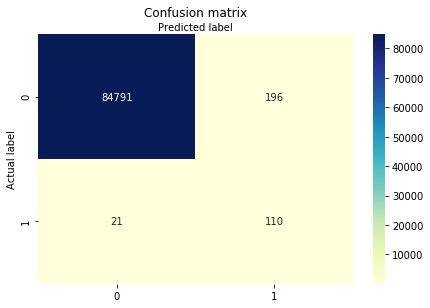

In [43]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [44]:
ran_fpr, ran_tpr, thresholds = metrics.roc_curve(y_test, y_pred)
metrics.auc(ran_fpr, ran_tpr)

0.9186942107086518

0.9699394527964178


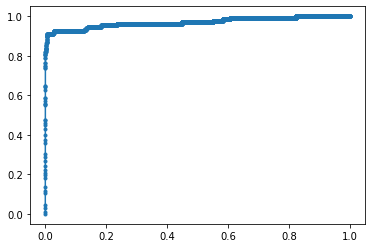

In [45]:
rana_probs = model_pipeline.predict_proba(X_test)
rana_probs = rana_probs[:, 1]

rana_auc = roc_auc_score(y_test, rana_probs)
print(rana_auc)

rana_fpr, rana_tpr, _ = metrics.roc_curve(y_test, rana_probs)

plt.plot(rana_fpr, rana_tpr, marker='.', label='Logistic')

Logistic: f1=0.503 auc=0.793


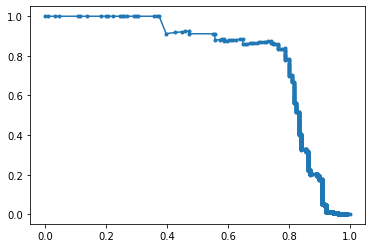

In [46]:
yhat = model_pipeline.predict(X_test)

ran_probs = model_pipeline.predict_proba(X_test)
ran_probs = ran_probs[:, 1]

ran_precision, ran_recall, _ = precision_recall_curve(y_test, ran_probs)
ran_f1, ran_auc = f1_score(y_test, yhat), auc(ran_recall, ran_precision)

print('Logistic: f1=%.3f auc=%.3f' % (ran_f1, ran_auc))

plt.plot(ran_recall, ran_precision, marker='.', label='ran')

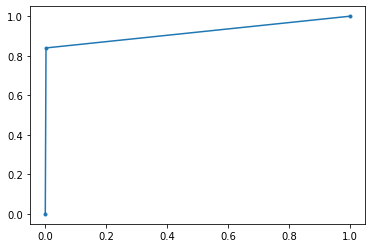

In [47]:
plt.plot(ran_fpr, ran_tpr, marker='.', label='Random Forest')

In [48]:
comparison_df=comparison_df.append({'Method': "Random Forest",'Score_Auc': rana_auc, 'Score_F1' : ran_f1 , 'Time' : ran_time},ignore_index=True)

In [49]:
comparison_df

,Method,Score_Auc,Score_F1,Time
0,Logistic,0.977105,0.184252,2.685932
1,Decission Tree,0.918784,0.181818,7.684012
2,Random Forest,0.969939,0.503432,121.121487


## No skill clas

In [50]:
y_pred = [0 for _ in range(len(y_test))]

In [51]:
ns_fpr, ns_tpr, thresholds = metrics.roc_curve(y_test, y_pred)
metrics.auc(ns_fpr,ns_tpr)

0.5

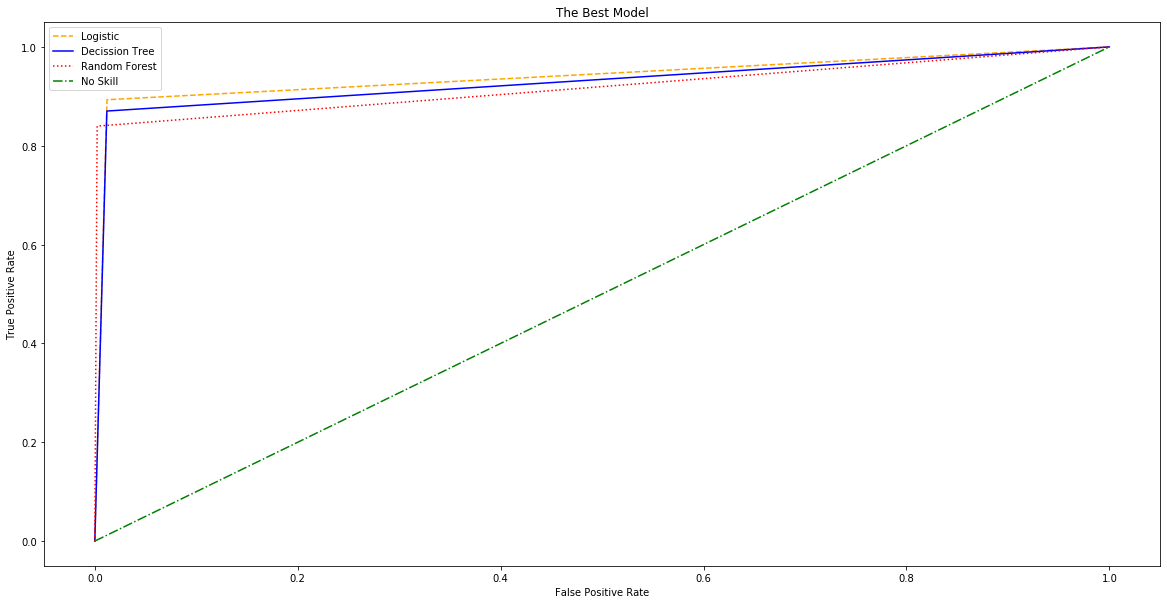

In [52]:
# plot the roc curve for the model
plt.figure(figsize=(20,10))
plt.plot(log_fpr, log_tpr, linestyle='--', label='Logistic', color = 'orange')
plt.plot(dec_fpr, dec_tpr, linestyle='-', label='Decission Tree', color = 'blue')
plt.plot(ran_fpr, ran_tpr, linestyle=':', label='Random Forest' , color = 'red' )
plt.plot(ns_fpr, ns_tpr, linestyle='-.', label='No Skill' , color = 'green' )

#marker='.'

#linestyle='--'  '-', '--', '-.', ':', '', 
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('The Best Model')
# show the legend
plt.legend()
# show the plot
plt.show()

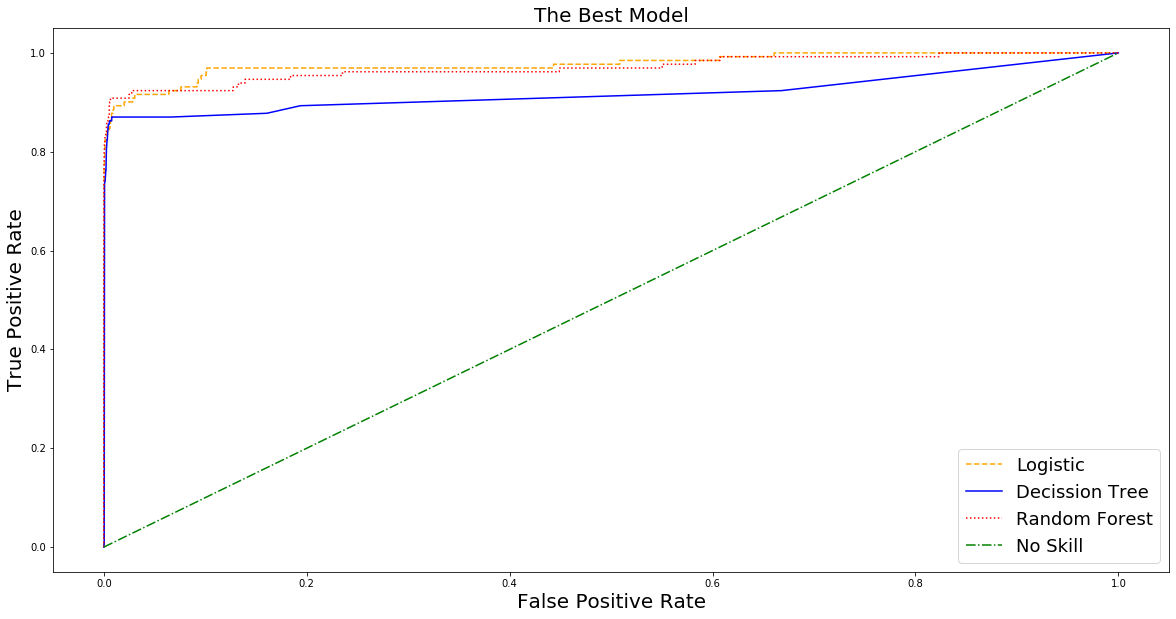

In [53]:
plt.figure(figsize=(20,10))
plt.plot(loga_fpr, loga_tpr, linestyle='--', label='Logistic', color = 'orange')
plt.plot(deca_fpr, deca_tpr, linestyle='-', label='Decission Tree', color = 'blue')
plt.plot(rana_fpr, rana_tpr, linestyle=':', label='Random Forest' , color = 'red' )
plt.plot(ns_fpr, ns_tpr, linestyle='-.', label='No Skill' , color = 'green' )

#marker='.'

#linestyle='--'  '-', '--', '-.', ':', '', 
# axis labels
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('The Best Model',fontsize=20)
# show the legend
plt.legend(fontsize=18)
# show the plot
plt.show()

In [54]:
no_skill = len(y_test[y_test==1]) / len(y_test)

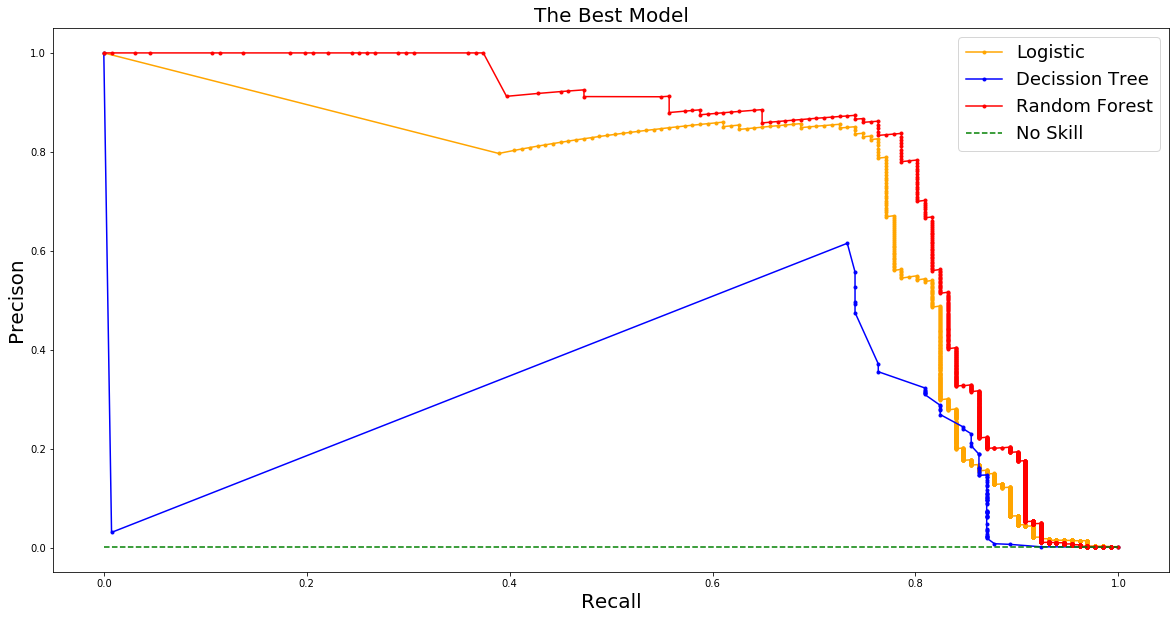

In [55]:
plt.figure(figsize=(20,10))
plt.plot(log_recall, log_precision, marker='.', label='Logistic', color = 'orange')
plt.plot(dec_recall, dec_precision, marker='.', label='Decission Tree', color = 'blue')
plt.plot(ran_recall, ran_precision, marker='.', label='Random Forest' , color = 'red' )
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill', color = 'green' )

#marker='.'

#linestyle='--'  '-', '--', '-.', ':', '', 
# axis labels
plt.xlabel('Recall',fontsize=20)
plt.ylabel('Precison',fontsize=20)
plt.title('The Best Model',fontsize=20)
# show the legend
plt.legend(fontsize=18)
# show the plot
plt.show()